Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 199s 4ms/step - loss: 1.4953 - acc: 0.4583 - val_loss: 1.2030 - val_acc: 0.5806
Epoch 2/5
50000/50000 [==============================] - 204s 4ms/step - loss: 1.1082 - acc: 0.6058 - val_loss: 0.9585 - val_acc: 0.6570
Epoch 3/5
50000/50000 [==============================] - 196s 4ms/step - loss: 0.9545 - acc: 0.6654 - val_loss: 0.8768 - val_acc: 0.6933
Epoch 4/5
50000/50000 [==============================] - 196s 4ms/step - loss: 0.8726 - acc: 0.6955 - val_loss: 0.7984 - val_acc: 0.7267
Epoch 5/5
10000/10000 [==============================] - 11s 1ms/step
正解率： 0.7315 loss： 0.7585696818351746


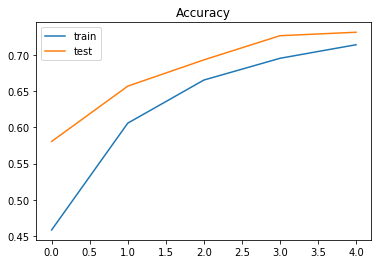

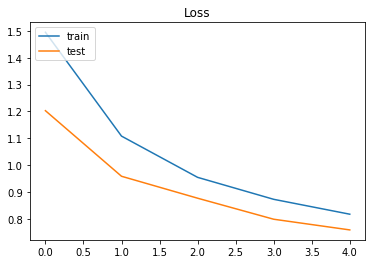

In [6]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols =32
in_shape =( im_rows , im_cols , 3)

# データ読み込み
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを一次元配列に変換（ついでにfloatに）
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# ラベルデータをOne-Hot形式に変換　ベクトル→0-9に
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデル定義 複雑なCNN
model = Sequential()
# 畳み込み層
# padding same出力画像は入力画像とサイズ同じ
model.add(Conv2D(32, (3,3), padding='same', input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# 0-9に
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# モデルコンパイル
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1, validation_data = (X_test, y_test))

# モデル評価
score = model.evaluate(X_test, y_test, verbose = 1)
print ( '正解率：', score[1], 'loss：', score[0])

# 学習の様子をグラフへ描画
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [7]:
model.save_weights('cifar10-weight.h5')